# **RENKON**
## DATA COLLECTION - PROJECT 1
## SOURCE CODE:
### (Created by Ritwik Chandra Pandey -  November 2021)

 ## **----------------------------------------------------------------------------------**

### LIBRARIES USED:
[re](https://docs.python.org/3/library/re.html),
[tabulate](https://pypi.org/project/tabulate/),
[requests](https://docs.python-requests.org/en/latest/),
[pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html),
[bs4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/),
[prettytable](https://pypi.org/project/prettytable/).

In [4]:
import re
from tabulate import tabulate
import requests
import pandas as pd
from bs4 import BeautifulSoup
from prettytable import PrettyTable

### Function 1 : **currency_info( doc )**
  
  
The role of this function is to extract the name, code and link to each and every currency available in [XE Currency Encyclopedia](https://www.xe.com/currency/). It takes _doc_ as argument which is actually a BeautifulSoup object representing the parsed document as a whole. Its basically an HTML document converted into a complex tree of Python objects.
The find_all function which is invoked using _doc_ returns all occurences of 'div' tag having class -'currency__CurrencySection-sc-1xymln9-3 kLTJuY', in the parsed document _doc_, as a list. 
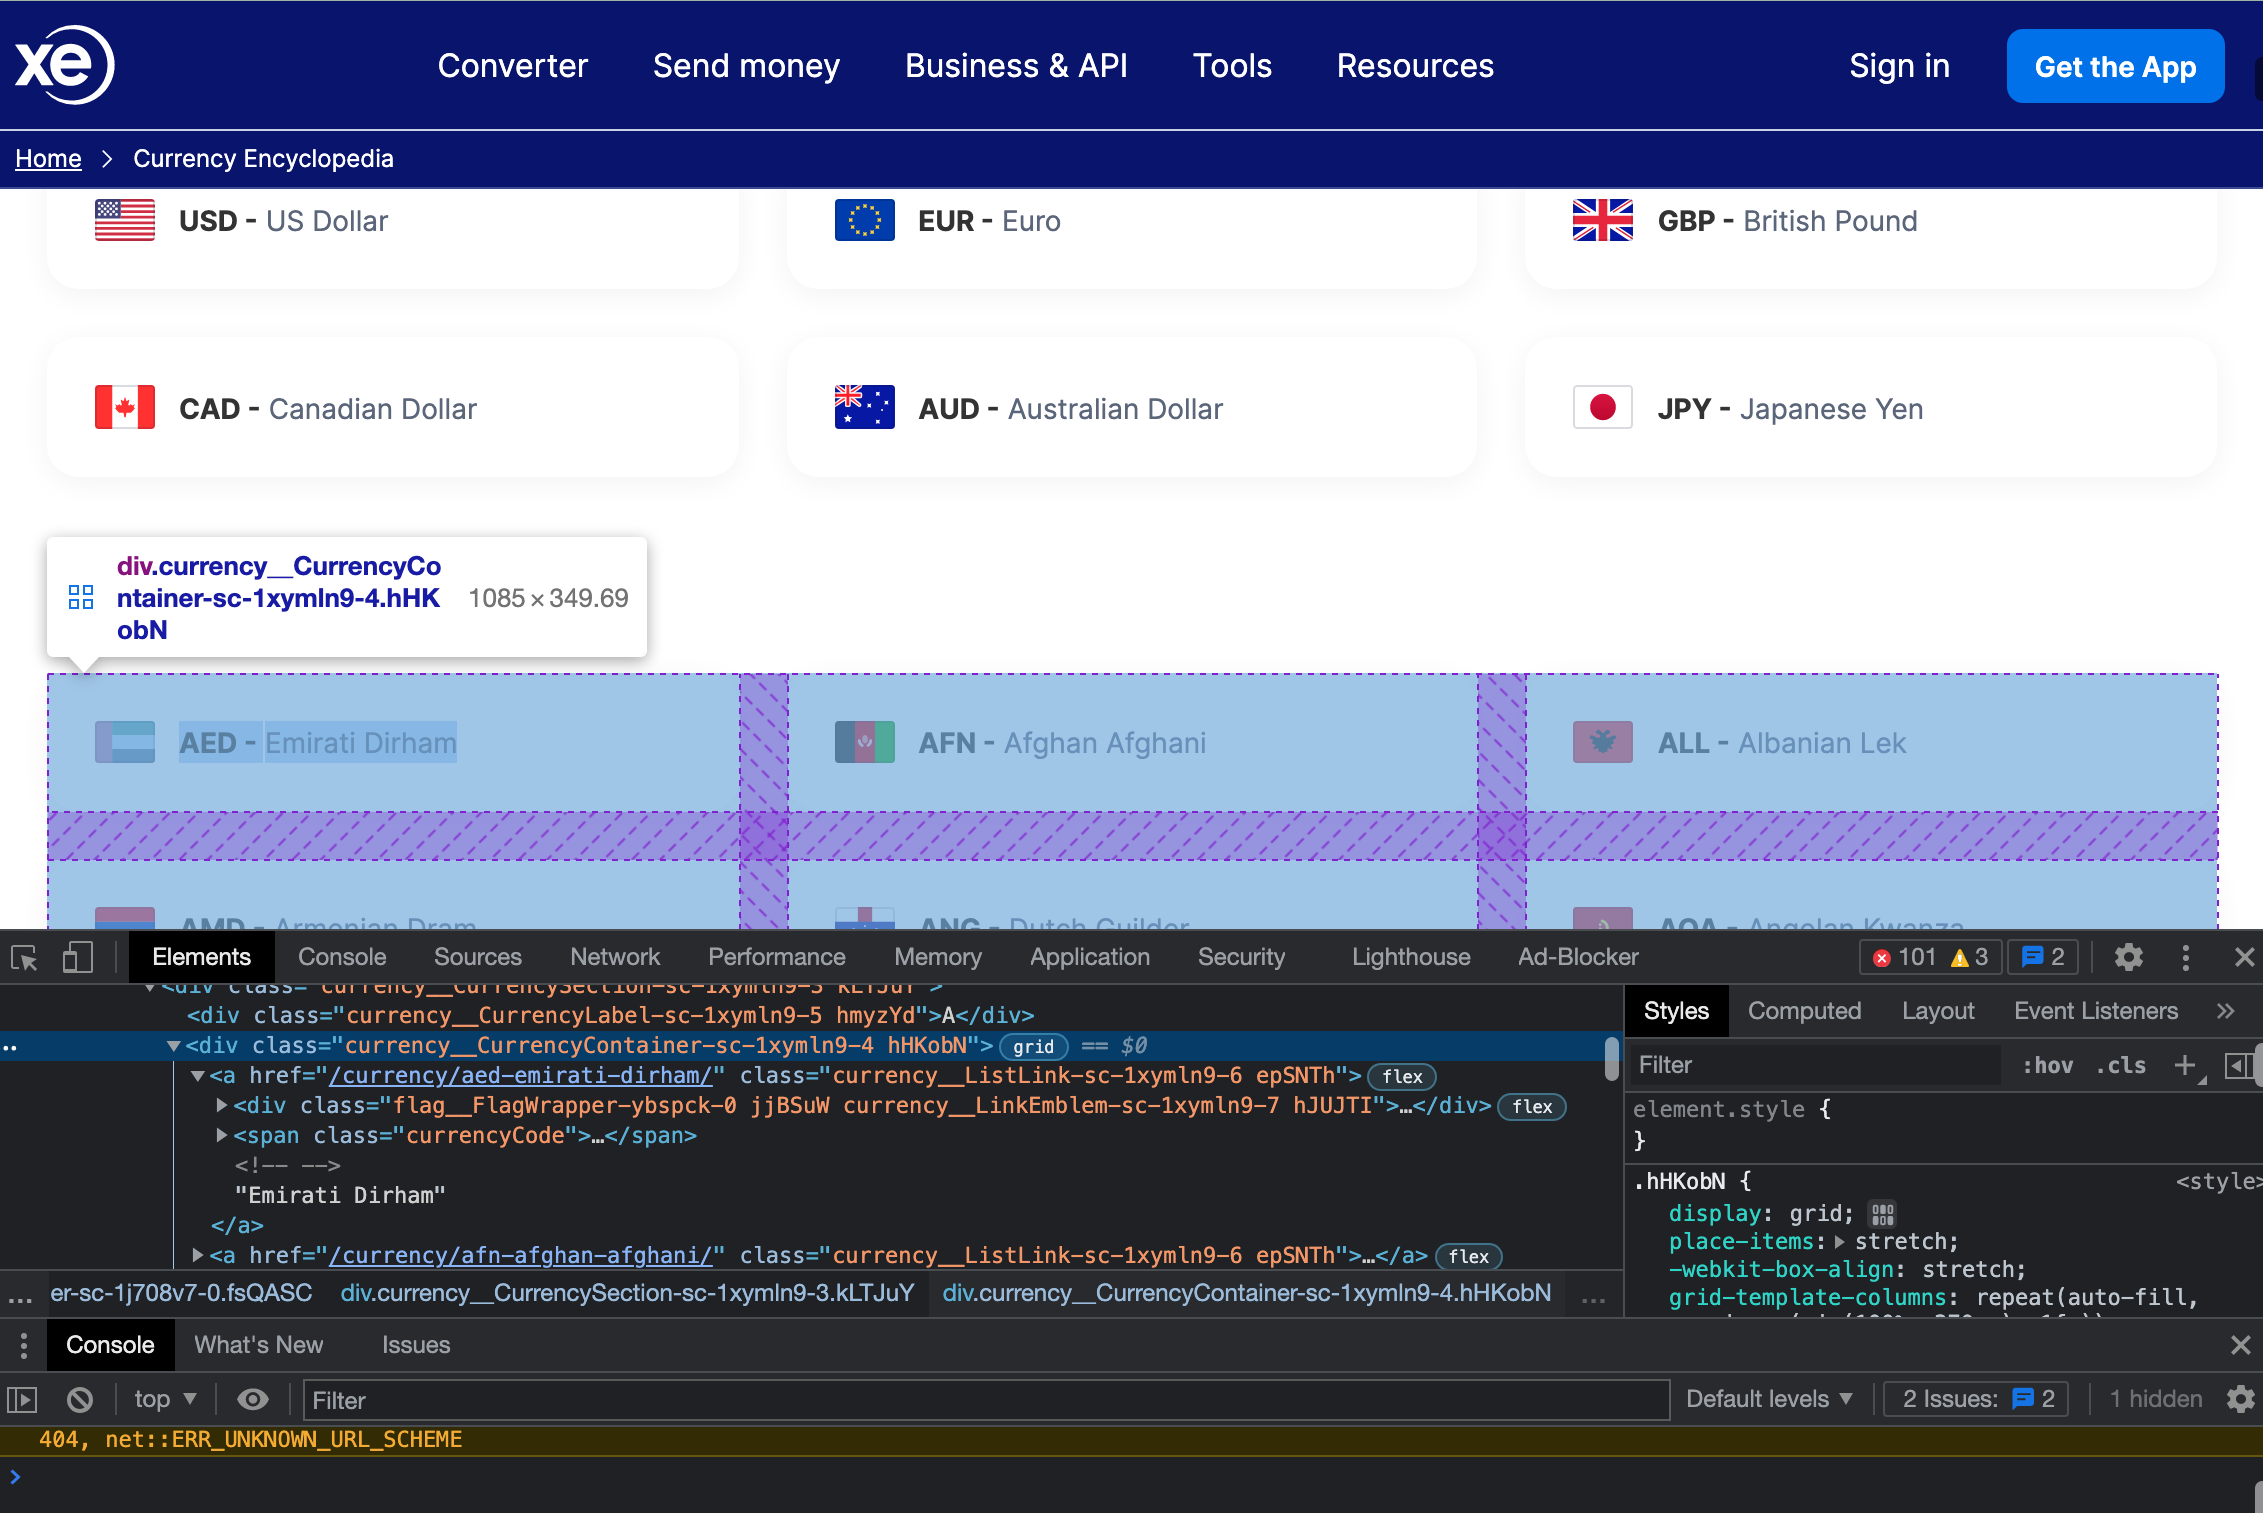

It goes on to define a _cur_dict_ dictionary with keys 'Name', 'Code' and 'Link' as shown below. Now, we do not want the _'popular'_  table on the top, thats why we start with 1 in the following for loop. The loop goes on till the length of _cur_ and finds all 'div' tags and puts them in _cur_in_, it also puts all 'a' tags in _cur_in_a_.  

Take a look at where 'a' tags occur in the above picture.  

Now, the links, currency codes and names are extracted similarly as shown in the code below and appeneded to _cur_dict_ appropriately. _cur_dict_ is then converted to dataframe using _pd.DataFrame()_ which is ultimately returned.

In [5]:
def currency_info(doc):
    cur = doc.find_all('div',{'class':'currency__CurrencySection-sc-1xymln9-3 kLTJuY'})
    cur_dict = {'Name':[],'Code':[], 'Links':[]} 
    for i in range(1,len(cur)):
        cur_in = cur[i].find_all('div',{'class':'currency__CurrencyContainer-sc-1xymln9-4 hHKobN'})
        cur_in_a = cur_in[0].find_all('a',{'class':'currency__ListLink-sc-1xymln9-6 epSNTh'})
        for j in range(len(cur_in_a)):           
                    cur_in_a_link = cur_in_a[j]['href']
                    cur_in_a_cc = (cur_in_a[j].find_all('span',{'class':'currencyCode'}))[0].text.split()[0]
                    cur_in_a_name = ' '.join(cur_in_a[j].text.split()[2:7])
                    cur_dict['Name'].append(cur_in_a_name)
                    cur_dict['Code'].append(cur_in_a_cc)
                    cur_dict['Links'].append('https://www.xe.com'+cur_in_a_link)

    df = pd.DataFrame(cur_dict)
    return df      

### Function 2 : **conversion( c1, c2, amount)**
The role of this function is to return the converted amount as well as the date and time of the last updation that took place of the exchange rate, all as a single string.  

Here, we have argumemets as _c1_, _c2_ and _amount_. _c1_ and _c2_ refer to country codes and _amount_ refers to the amount that needs to be converted. The _code_url_ is customized as per the link of the webpage, using _amount_ that is obtained from the argument. _response_ is a request object and response.text is the HTML code of the webpage.  

response.text and 'html.parser' are fed to BeautifulSoup to obtain parsed document called _doc_. Then, a check takes place where the status code of the response object is checked. Anything other than 200 is an error and appropriate exception is kept raedy to deal with the error.  
  
find_all returns 'p' tags having the class as shown below to extact the conversion amount and similarly 'div' tags are obtained to extract the time and date of last update.  

  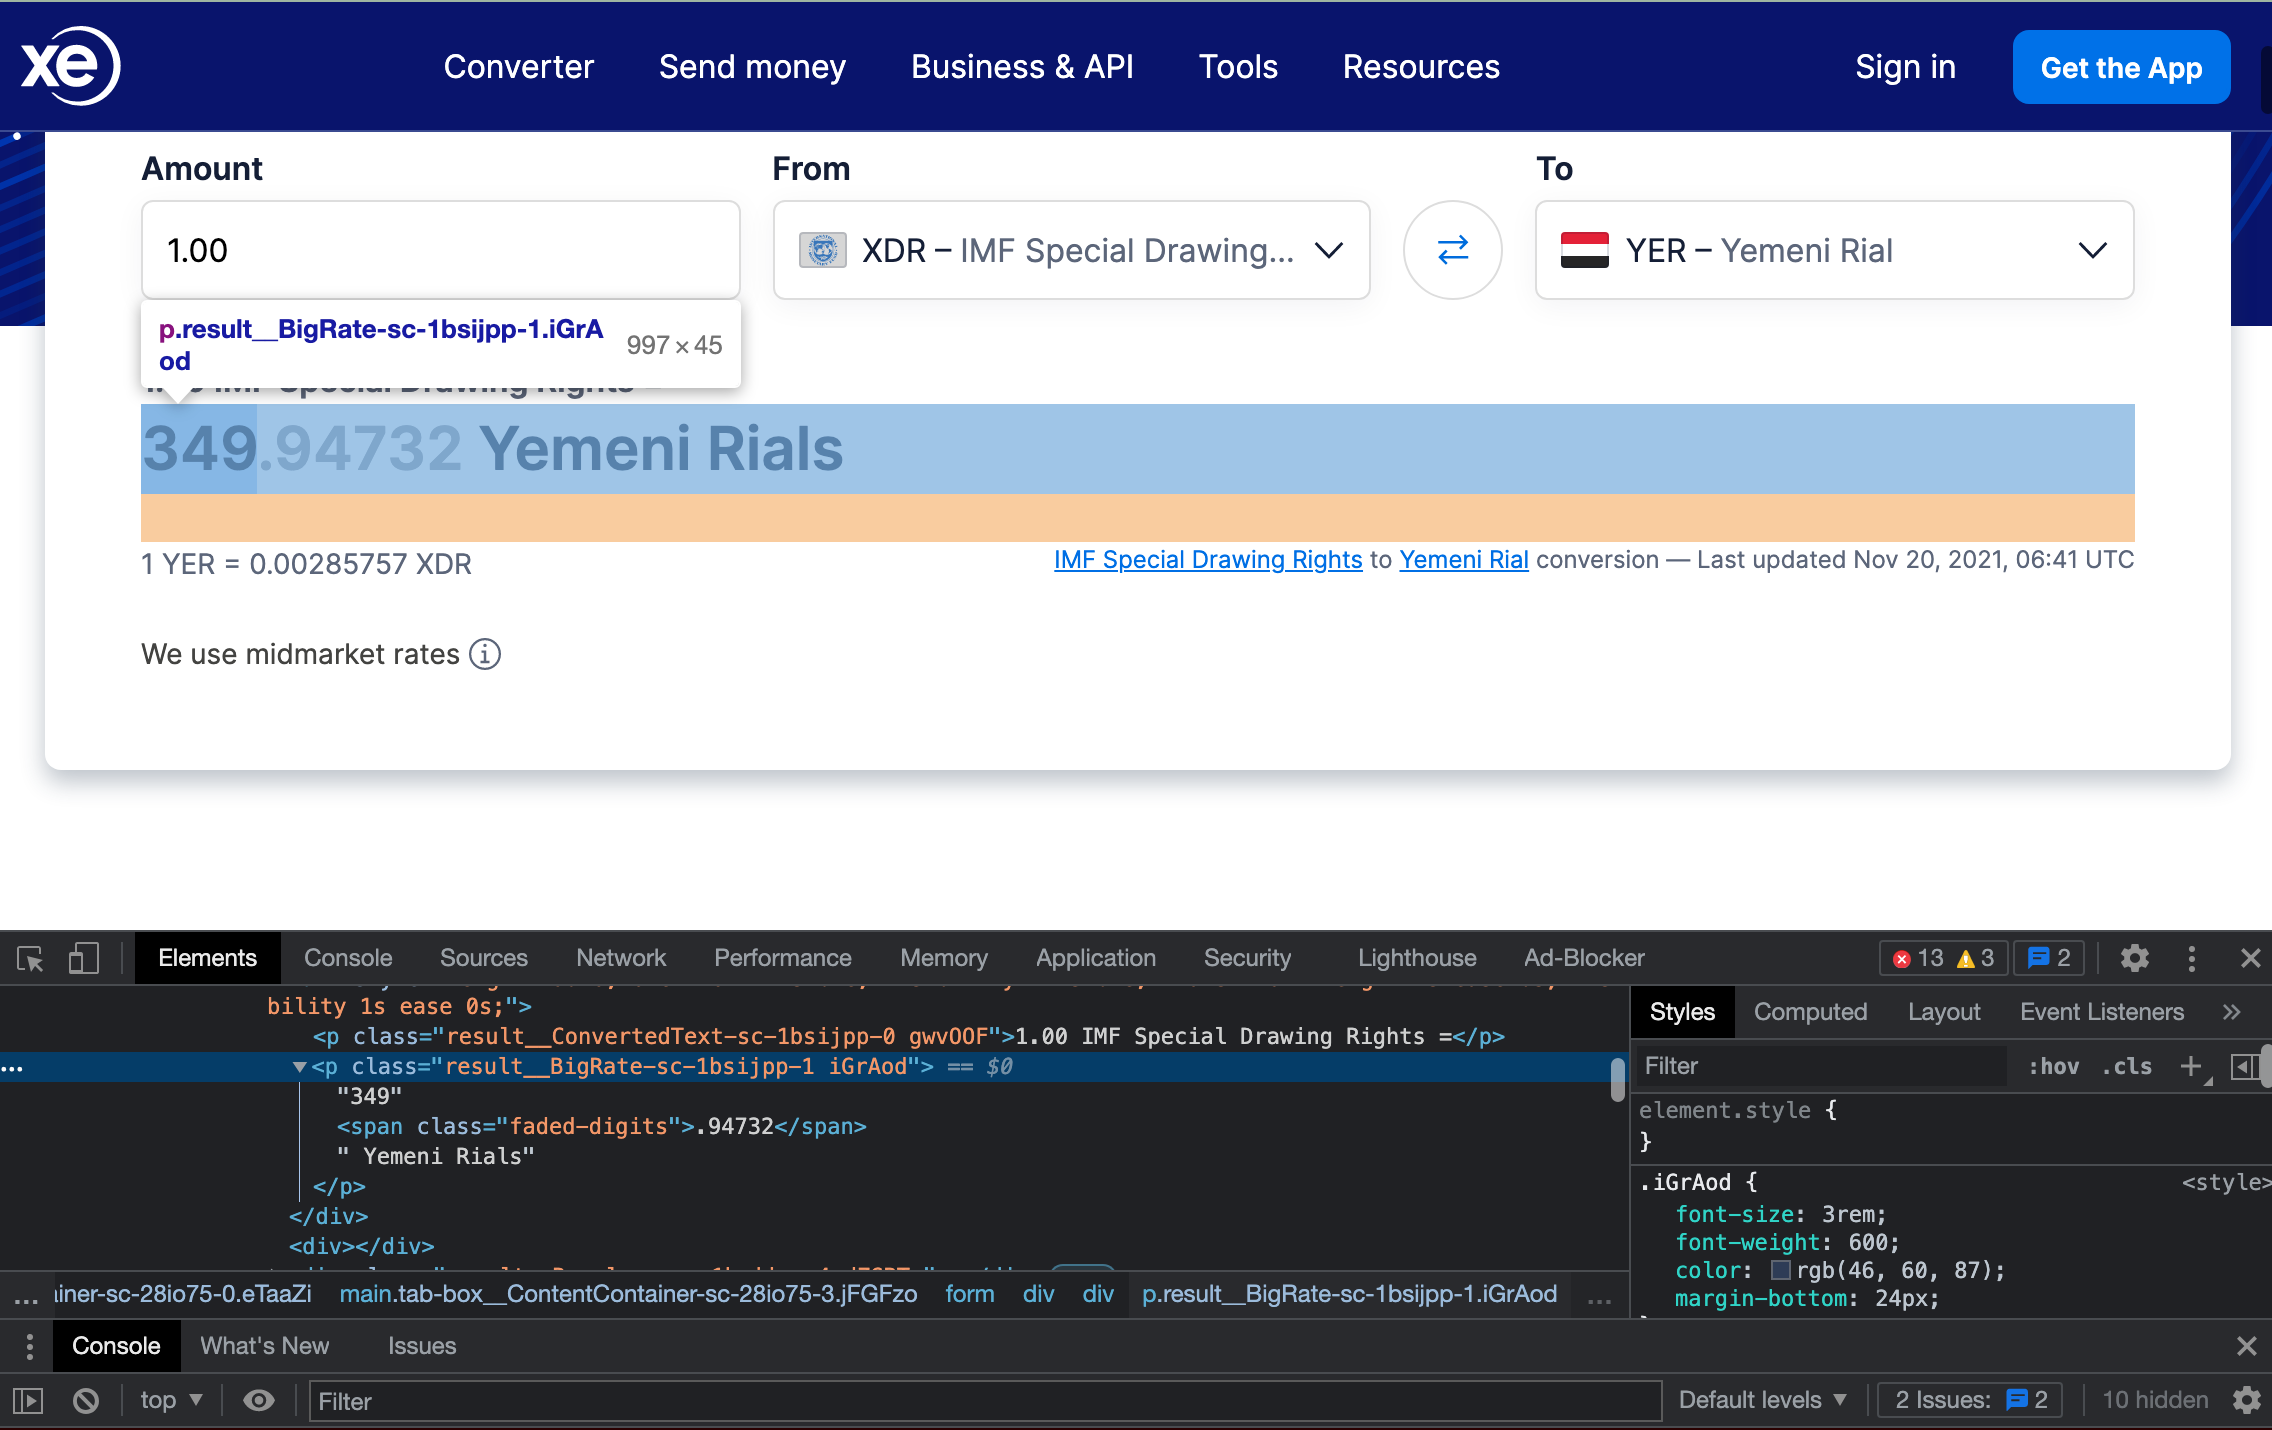

 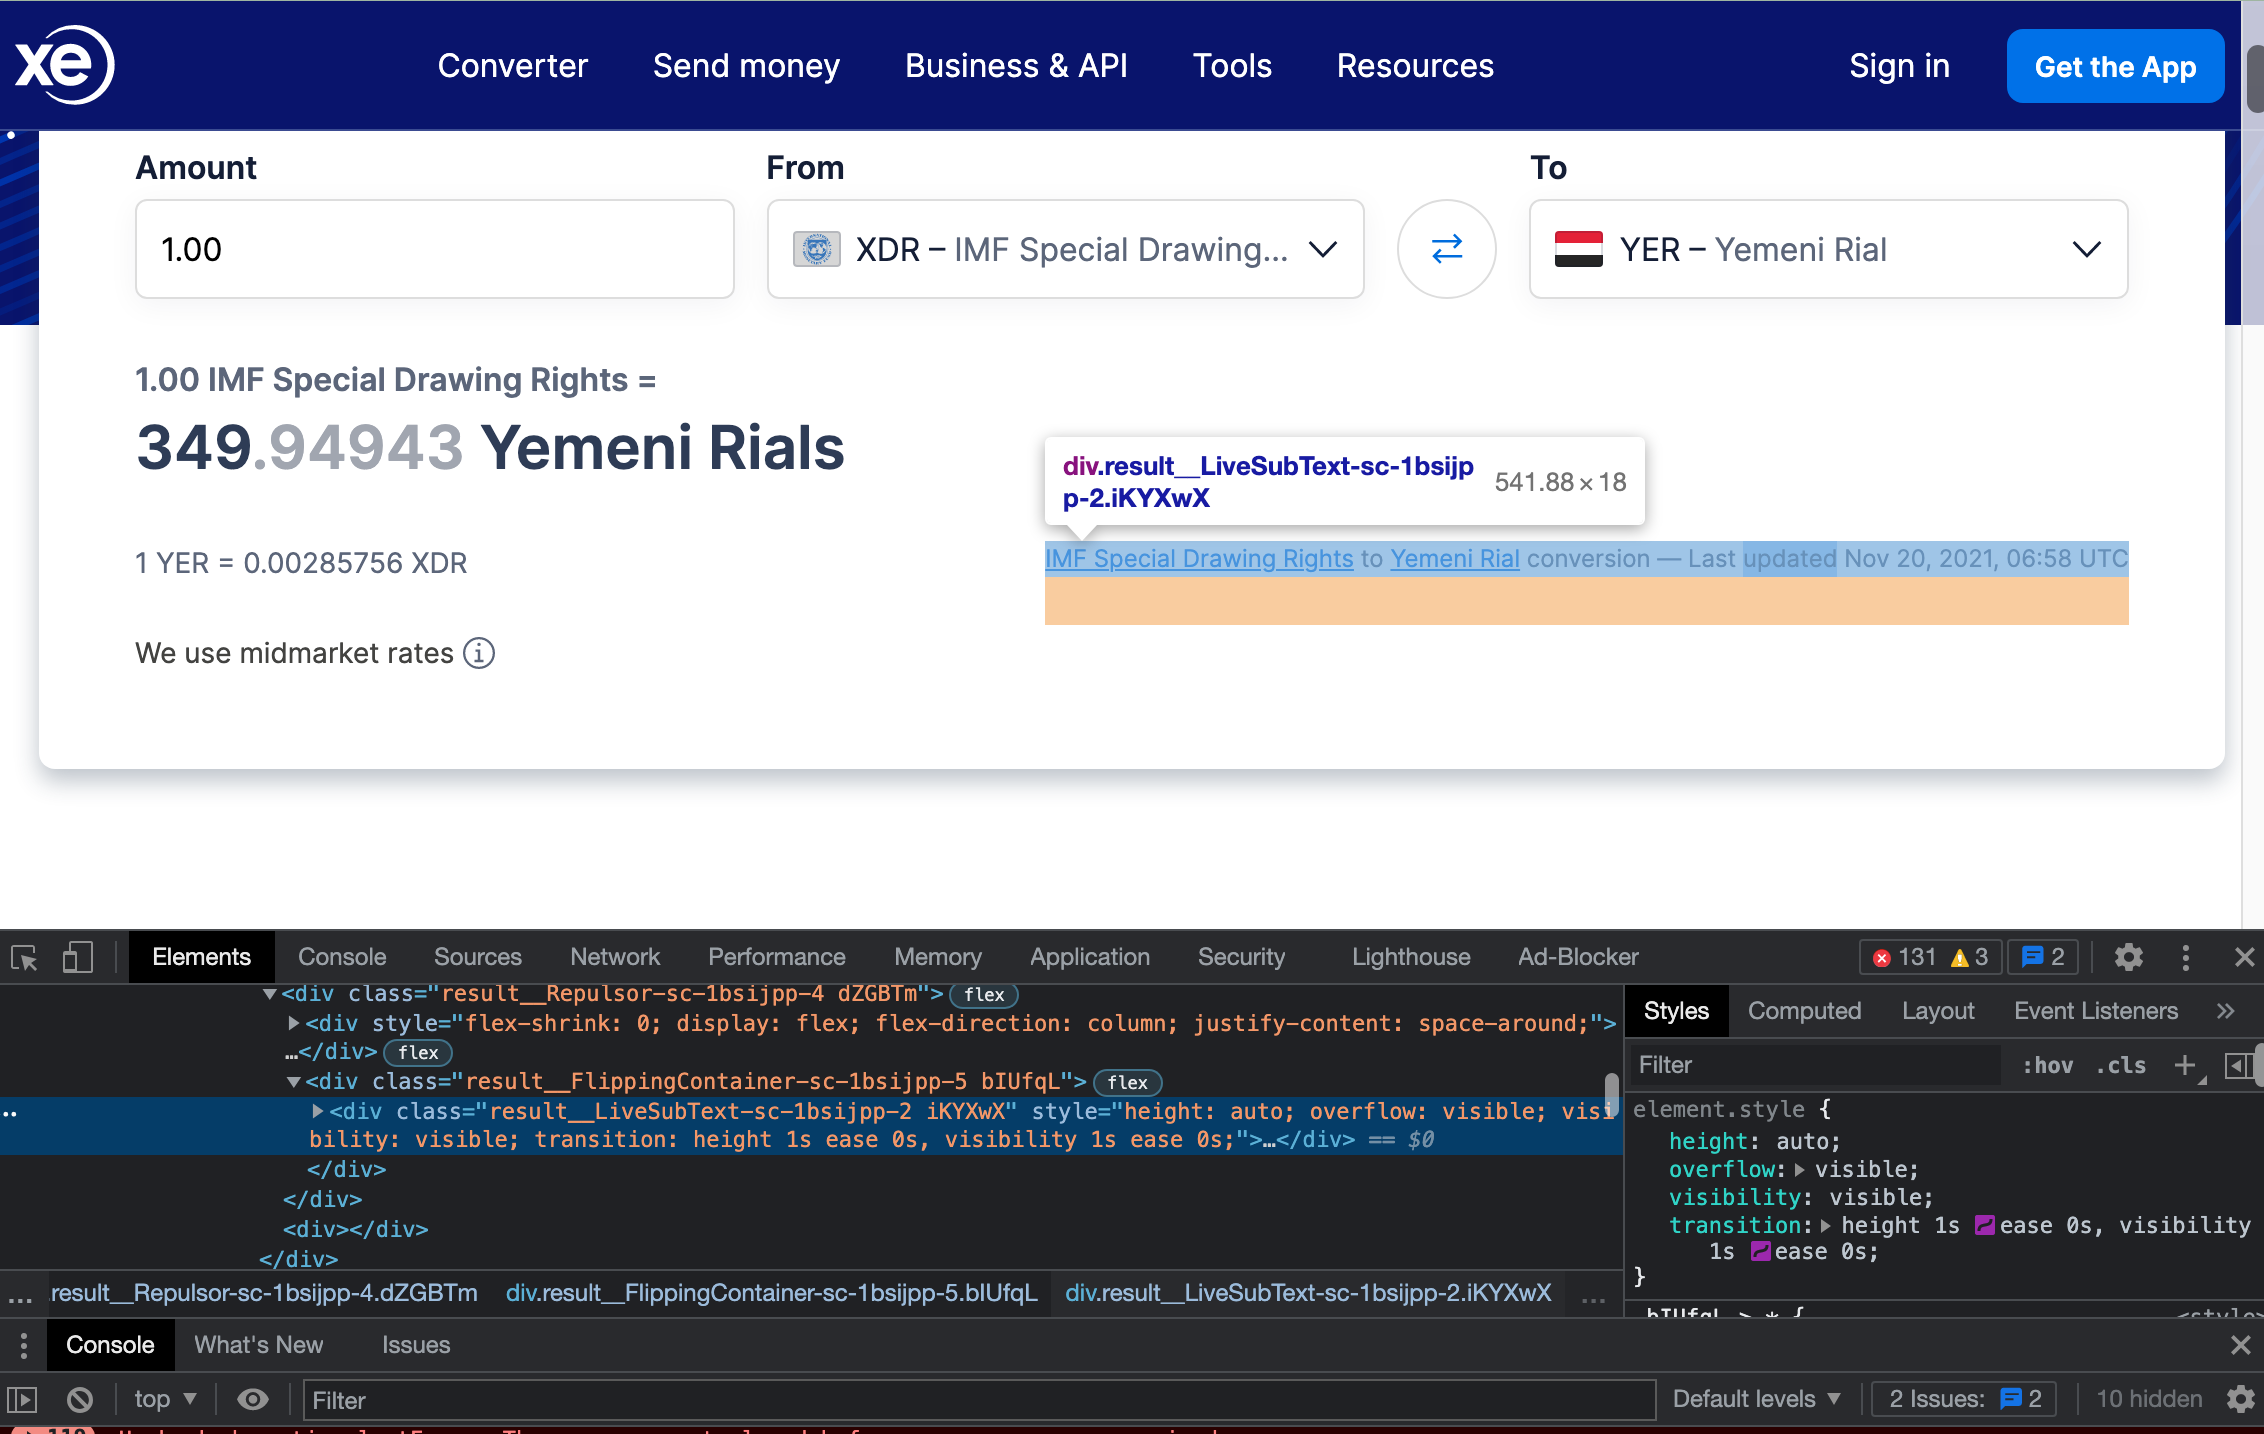

  

In [6]:
def conversion(c1,c2,amount):
        code_url = 'https://www.xe.com/currencyconverter/convert/?Amount='+ str(amount) + '&From=' + c1 + '&To=' + c2 
        response = requests.get(code_url)
        doc = BeautifulSoup(response.text, 'html.parser')
        if response.status_code != 200:
            raise Exception('Failed to load page {}'.format(code_url))
        conv = doc.find_all('p',{'class':'result__BigRate-sc-1bsijpp-1 iGrAod'})
        time = doc.find_all('div',{'class':'result__LiveSubText-sc-1bsijpp-2 iKYXwX'})
        return conv[0].text + " [" + time[0].text + " ]"
    

### Function 3 : **stats_conv( c1, c2, amount )**
This function prints the stats table shown in the picture below. The stats table is unique and depends on the input that the user gives.

Here, we have argumemets as _c1_, _c2_ and _amount_. _c1_ and _c2_ refer to country codes and _amount_ refers to the amount that needs to be converted. The _code_url_ is customized as per the link of the webpage, using _amount_ that is obtained from the argument. _response_ is a request object and response.text is the HTML code of the webpage.  

response.text and 'html.parser' is fed to BeautifulSoup to obtained parsed document called 'doc'. Then, a check takes place where the status code of the response object is checked. Anything other than 200 is an error and appropriate exception is kept raedy to deal with the error.  

The _find_all_ function is then used to exatract the heading as shown. The code below and the html code in the image can be compared to understand why code has been written like this.
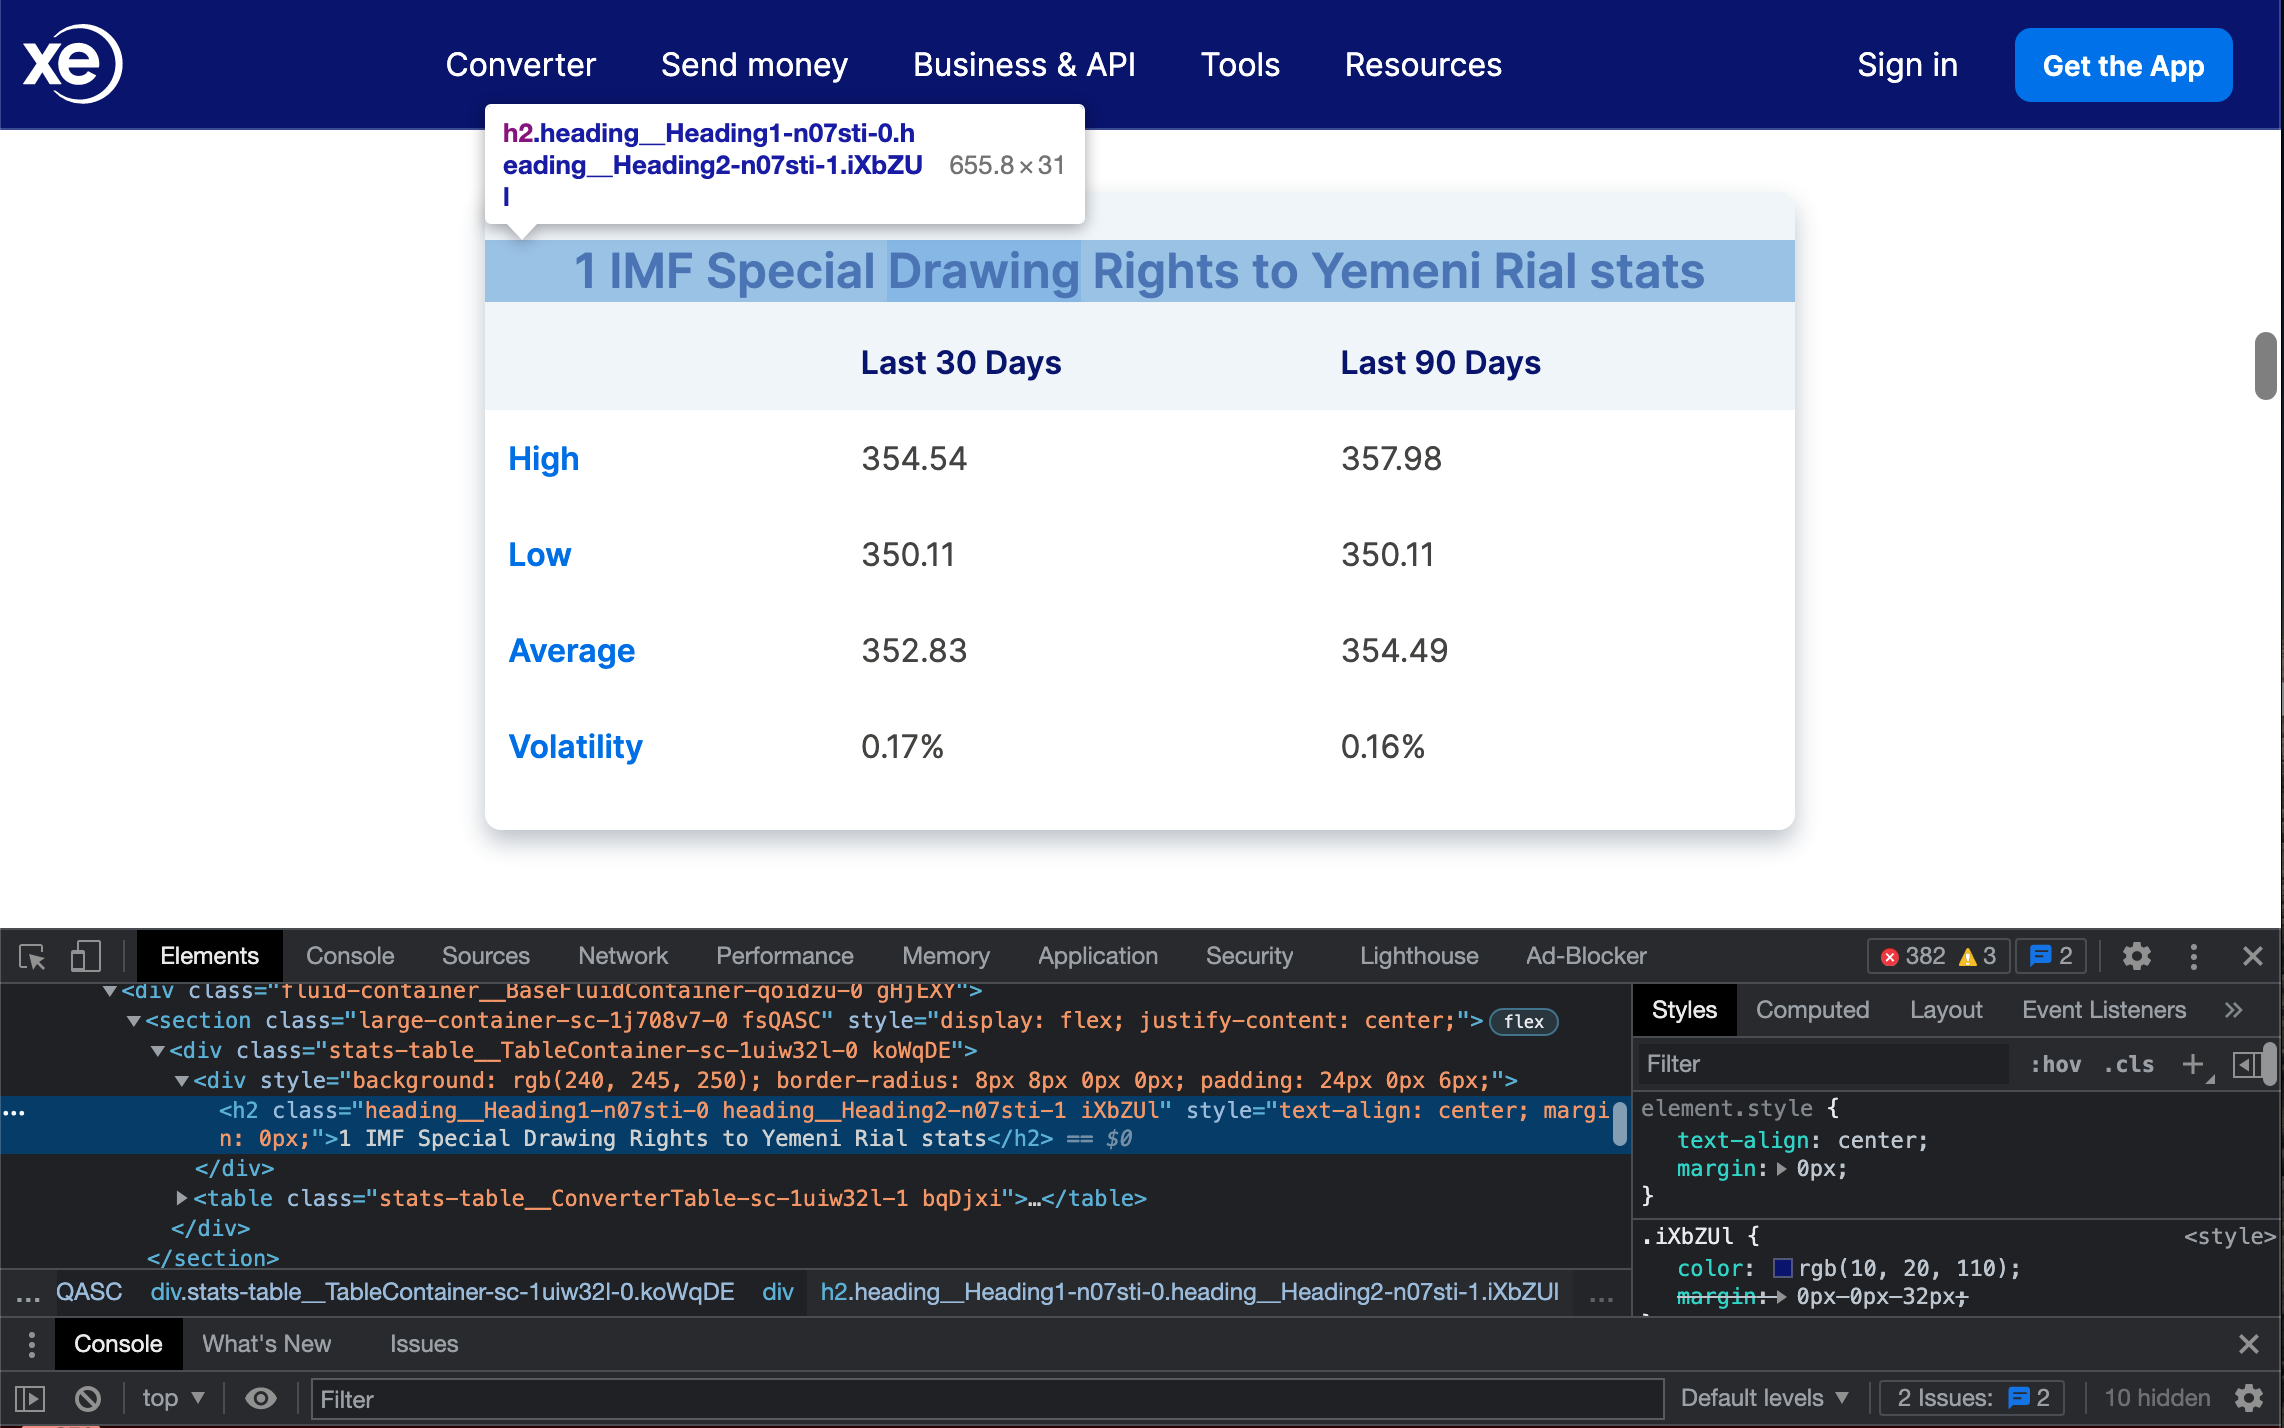


To extract the table shown in the picture, the following code is written (lines starting with _sub_ and _row_ ) and then a table is created using _PrettyTable()_. The rows are added to the table one by one by extarcting information bit by bit from the webpage, keeping in mind all the functions required to carry out the same.   
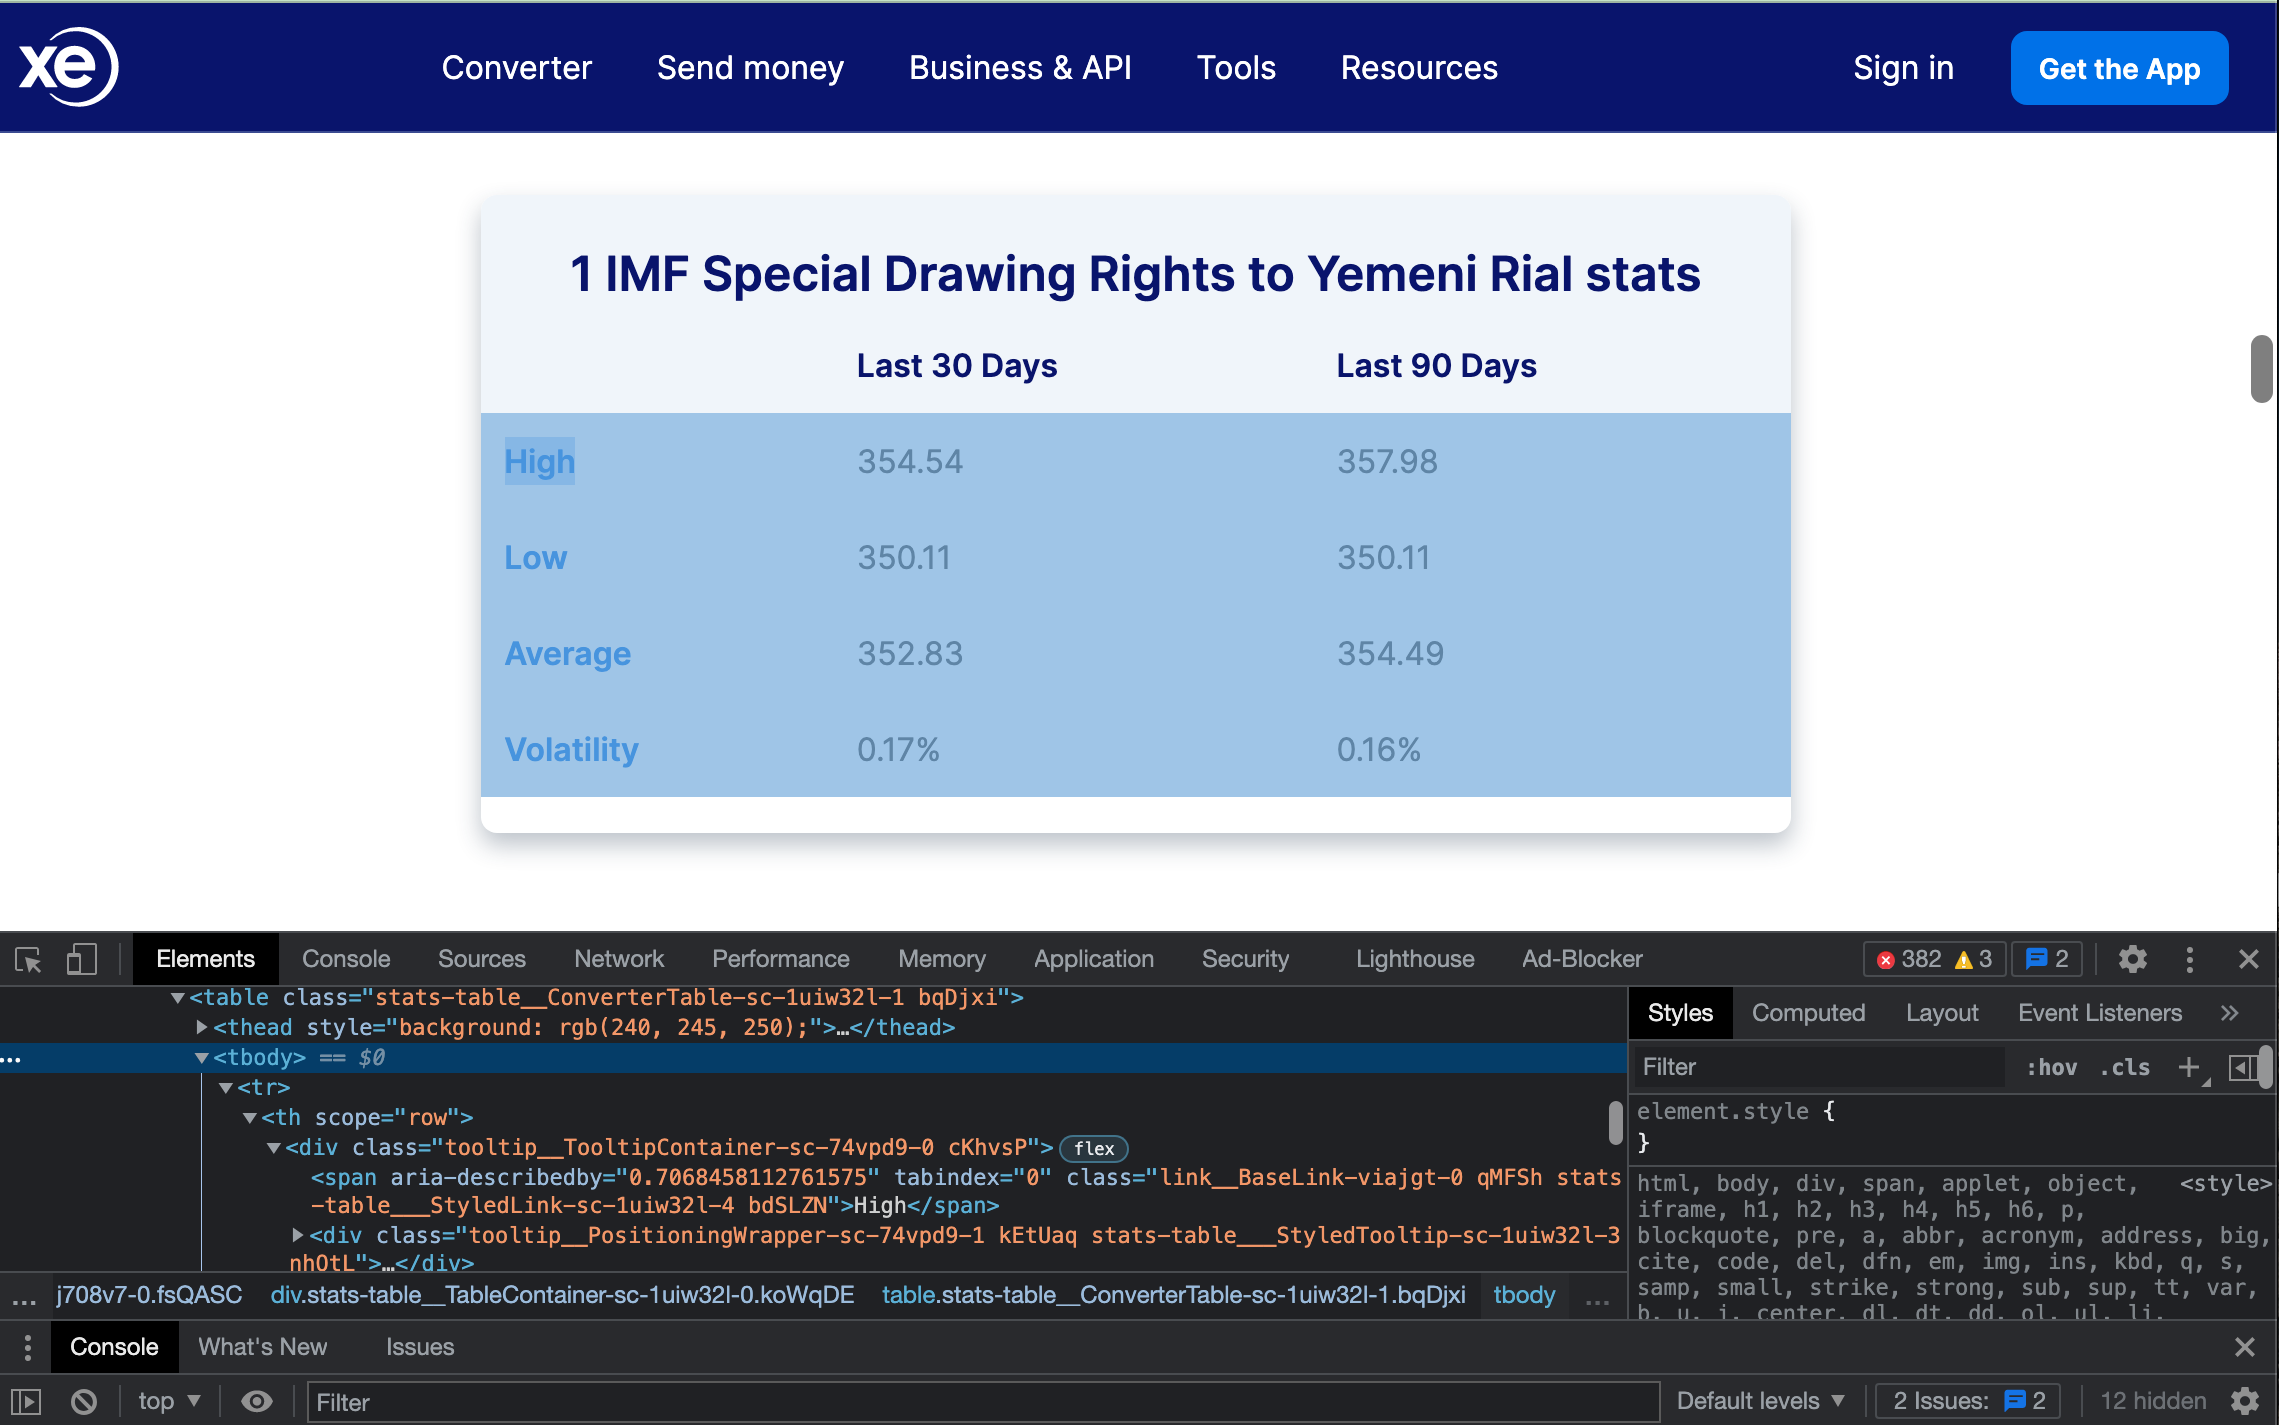  

The details about the functions in prettytable library can be found in its [documentation](https://pypi.org/project/prettytable/).

In [7]:
 def stats_conv(c1,c2,amount):
        code_url = 'https://www.xe.com/currencyconverter/convert/?Amount='+ str(amount) + '&From=' + c1 + '&To=' + c2 
        response = requests.get(code_url)
        doc = BeautifulSoup(response.text, 'html.parser')
        if response.status_code != 200:
            raise Exception('Failed to load page {}'.format(code_url))
        stats= doc.find_all('h2',{'class':'heading__Heading1-n07sti-0 heading__Heading2-n07sti-1 iXbZUl'})    
        sub = doc.find_all('th',{'class':'stats-table__ColumnHeading-sc-1uiw32l-2 kqQaYk'})
        row = doc.find_all('div',{'class':'tooltip__TooltipContainer-sc-74vpd9-0 cKhvsP'})
        row_values = doc.find_all('td')
        stats_table = PrettyTable()
        stats_table.field_names = [" ",sub[0].text,sub[1].text]
        stats_table.title  = stats[0].text
        stats_table.add_row([row[7].text[0:4],row_values[44].text,row_values[45].text])
        stats_table.add_row([row[8].text[0:3],row_values[46].text,row_values[47].text])
        stats_table.add_row([row[9].text[0:7],row_values[48].text,row_values[49].text])
        stats_table.add_row([row[10].text[0:10],row_values[50].text,row_values[50].text])
        
        print(stats_table)
        

### Function 4 : **stat1( doc )** 
This function is used to display stats of the currency given as input.  

Here, the parsed document _doc_ is the argument once again. It is used to call find_all() to extract the heading of the Stats table shown here.  

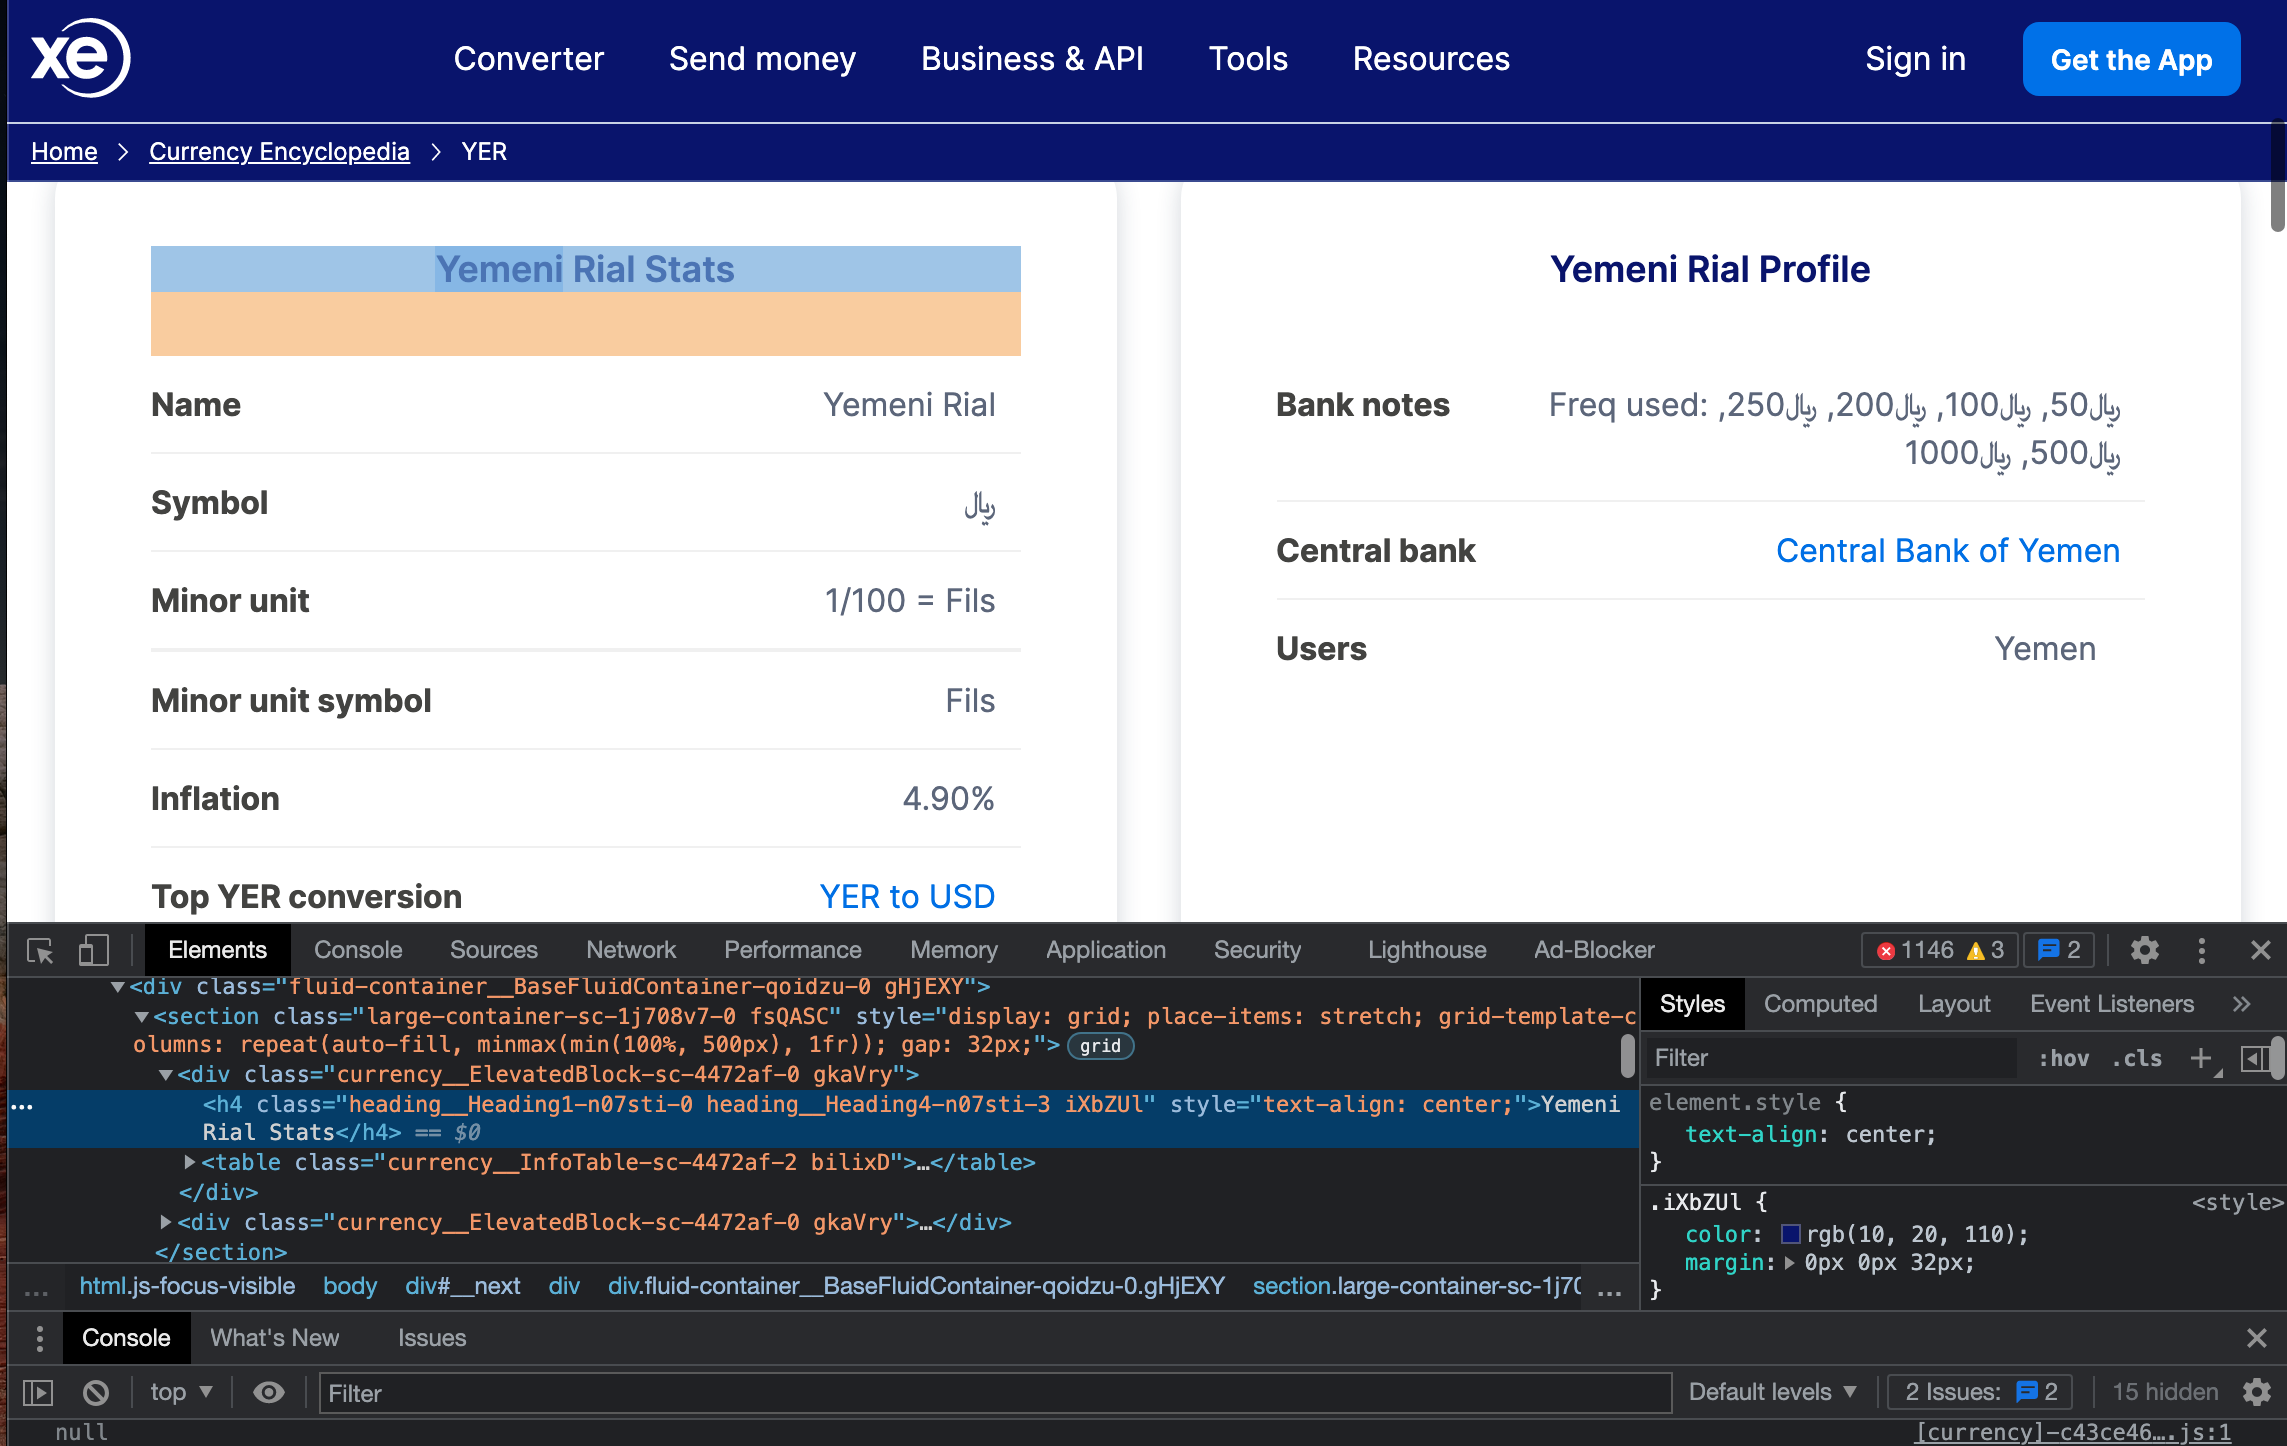

A table is created once again using _PrettyTable()_ and field names (column names) are assigned to it. Now, _Heading_ has two headings from the two tables shown in the picture above. The first heading is selected by specifying Heading[0] and later on (as we shall see), the second heading is used by specifying Heading[1].  

Again, 'table' tags are extracted to get the table.  

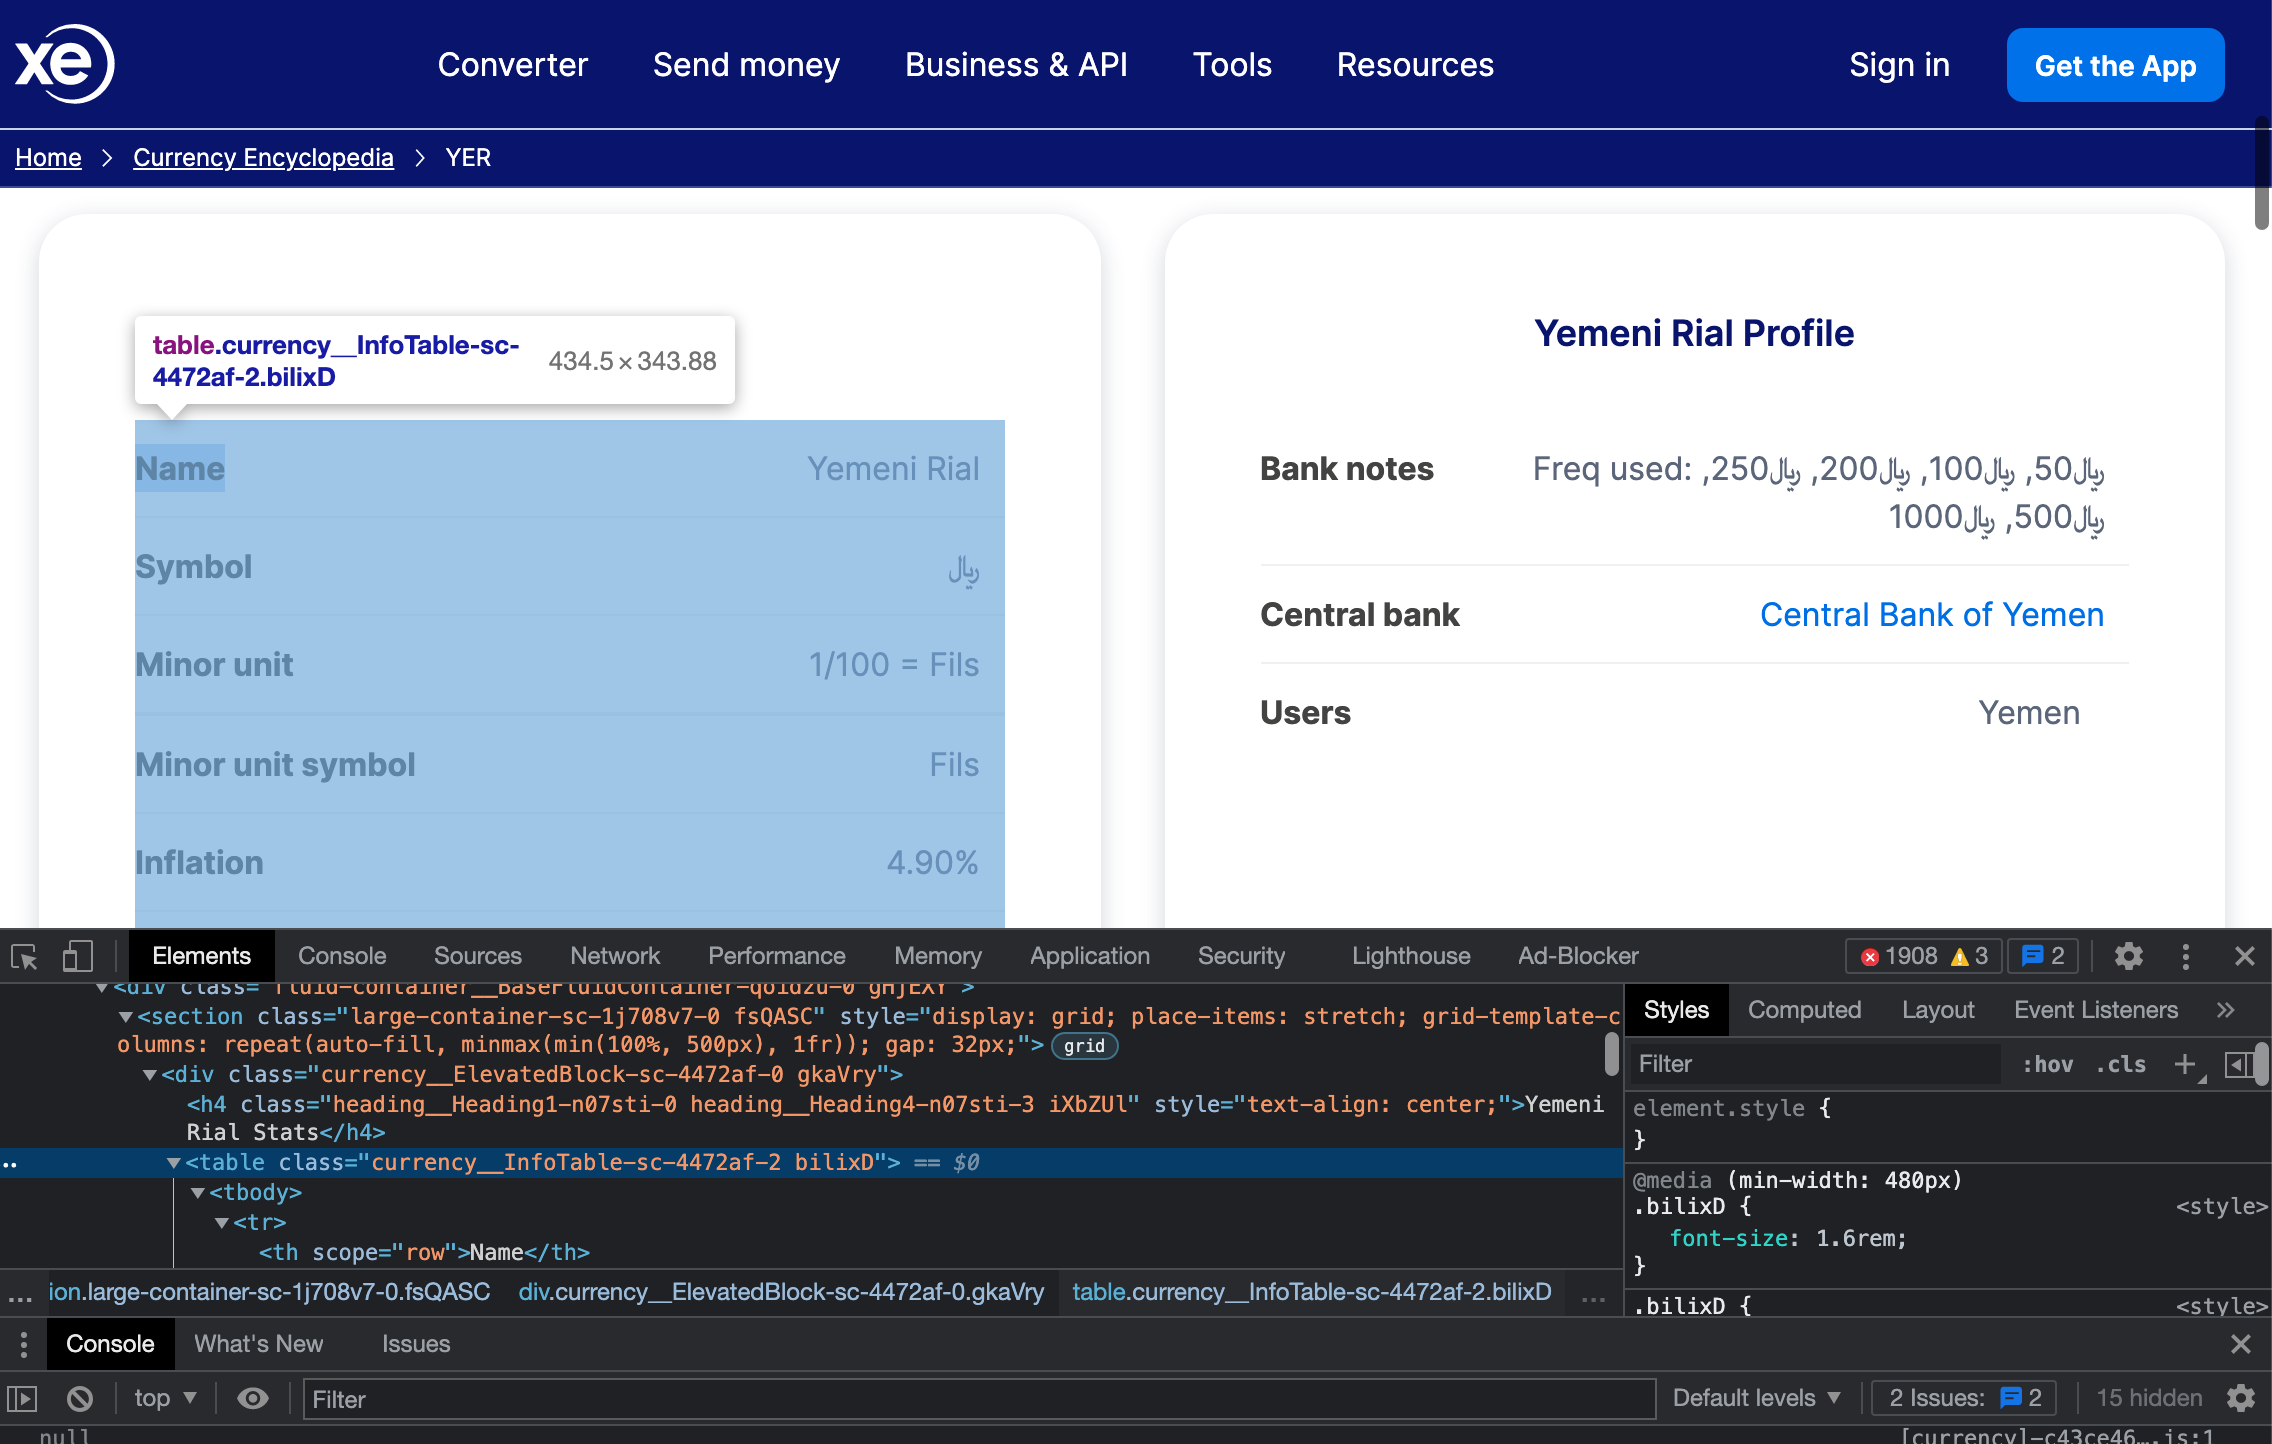


The rows are added one by one to _stats_curr_table_ by using _add_row_ function. There is a case that needs to be handled here - sometimes 'Minor unit symbol' is empty. To handle this, the if else cases have been written. Sometimes, 'Minor unit' might also be empty, but that is automatically taken care without any if else cases.   

In the end, the _stats_curr_table_ is returned.

In [8]:
def stat1(doc):
        Heading = doc.find_all('h4',{'class','heading__Heading1-n07sti-0 heading__Heading4-n07sti-3 iXbZUl'})    
        stats_curr_table = PrettyTable()
        stats_curr_table.field_names = [" "," Details"]
        stats_curr_table.title = Heading[0].text 
        Table = doc.find_all('table',{'class','currency__InfoTable-sc-4472af-2 bilixD'})
        stats_curr_table.add_row((Table[0].find_all('tr')[0].text[0:4] + " " + Table[0].find_all('tr')[0].text[4:]).split(" ",1))
        stats_curr_table.add_row((Table[0].find_all('tr')[1].text[0:6] + " " + Table[0].find_all('tr')[1].text[6:]).split(" ",1))
        L1 = (Table[0].find_all('tr')[2].text[0:10] +" " + Table[0].find_all('tr')[2].text[10:]).split(" ",2)
        stats_curr_table.add_row((" ".join(L1[0:2])).split("-") + L1[2:]  ) 
        L2 = (Table[0].find_all('tr')[3].text[0:17] + " " + Table[0].find_all('tr')[3].text[17:]).split()
        if(len((" ".join(L2[0:3])).split("-") + L2[3:]) == 1):
            stats_curr_table.add_row((" ".join(L2[0:3])).split("-") + L2[3:] + [' '])
        else:
            stats_curr_table.add_row((" ".join(L2[0:3])).split("-") + L2[3:])   


        return stats_curr_table

### Function 5 : **stat2( doc )**
This function is used to display the profile of the currency given as input.  

Here, the parsed document _doc_ is the argument once again. It is used to call _find_all()_ to extract the heading of the Profile table shown here. A table is once again created using _PrettyTable()_. Heading[1] is used as the second heading is what we are looking for this time. The is extracted using 'table' tag.  
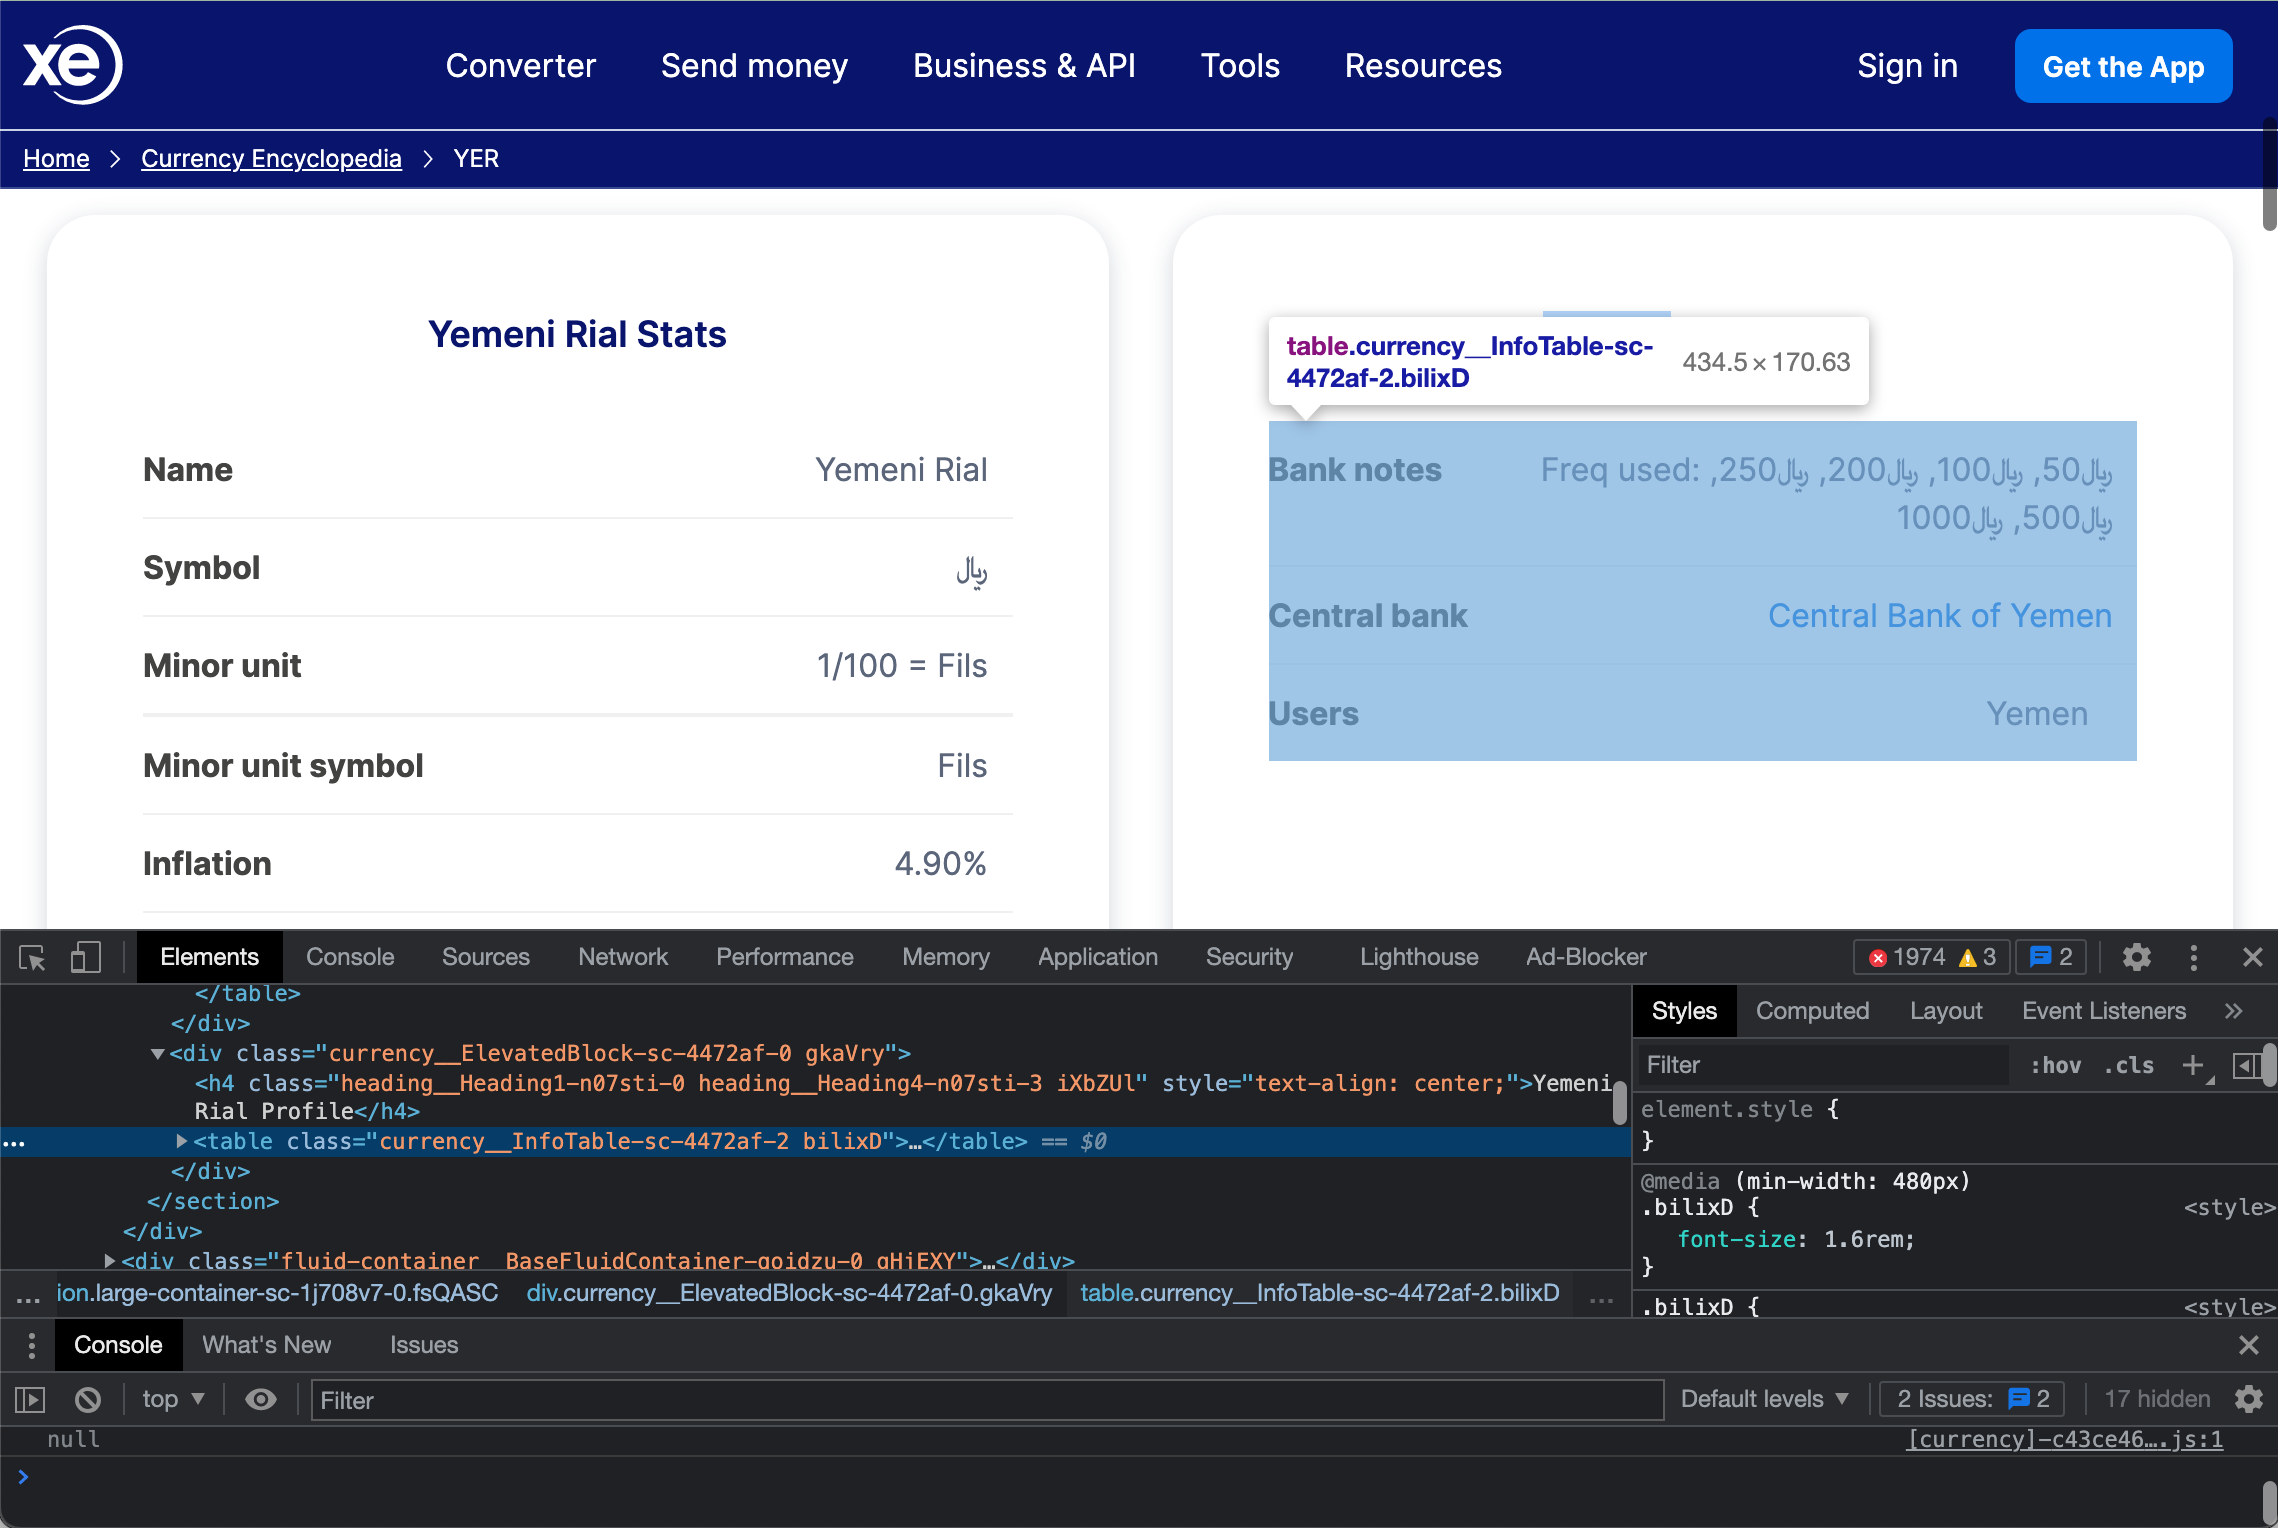


There are maximum 5 rows possible for the table: Nicknames, Coins, Bank notes, Central bank and Users (always in the same order). Now, it is possible to have only Users row; only Central Bank and Users rows; only Bank notes, Central bank and Users rows and so on like this. All these cases need to be handled, that is why a number of if elif cases are considered as shown in the code below.  


For the first if, it checks (using _find_all()_) whether the only row is Users row or not, if yes, then it extracts that row and returns the _stats_curr_table_. (A corner case is handled here when the no. of users is more than three : '...' is added after three users and this detail is added as the row of the table. This is taken care in all if elif cases that follow) 

For the elif that follows, it checks (using _find_all()_) whether the first row is Central Bank or not, if yes, then Central bank row and Users rows are added to the table and table is returned.  


For the second elif, it checks (using _find_all()_) whether the first row has 'Bank' in it or not. If yes, then Bank notes, Central bank and Users rows are added to the table and the table is returned.  


The same pattern is followed for the next one and the last else case is for the case when all the rows are present.    


One corner case occures for Bank notes and Coins, where there is additional 'Rarely used' information. That is also taken care for all currencies using re.search() (imported [re](https://docs.python.org/3/library/re.html) for this) function and searching for the word 'Rarely' in the Coins and Bank notes rows. 

In [9]:
def stat2(doc):
        Heading = doc.find_all('h4',{'class','heading__Heading1-n07sti-0 heading__Heading4-n07sti-3 iXbZUl'})    
        stats_curr_table = PrettyTable()
        stats_curr_table.field_names = [" "," Details"]
        stats_curr_table.title = Heading[1].text  
        Table = doc.find_all('table',{'class','currency__InfoTable-sc-4472af-2 bilixD'})
        
                
        if(Table[1].find_all('tr')[0].text[0:5].split("-")[0] == 'Users'):
            list1 = (Table[1].find_all('tr')[i].text[0:5].split("-"))
            list2 = (doc.find_all('span',{'class':'currency__OneLineSpan-sc-4472af-3 bzUWsw'})[0].text.split("-"))
            if(len(list2[0].split(','))>3):
                list2 = list2[0].split(',')[0:3] + ['...']
                list2 = (','.join(list2)).split('-')
                
            stats_curr_table.add_row(list1+list2)
            
        
        elif((Table[1].find_all('tr')[0].text[0:12] +" " + Table[1].find_all('tr')[0].text[12:]).split(" ",2)[0] == 'Central bank'):
            L2 = (Table[1].find_all('tr')[0].text[0:12] +" " + Table[1].find_all('tr')[0].text[12:]).split(" ",2)
            stats_curr_table.add_row((" ".join(L2[0:2])).split("-") + L2[2:]  )
            list1 = (Table[1].find_all('tr')[i].text[0:5].split("-"))
            list2 = (doc.find_all('span',{'class':'currency__OneLineSpan-sc-4472af-3 bzUWsw'})[0].text.split("-"))
            if(len(list2[0].split(','))>3):
                list2 = list2[0].split(',')[0:3] + ['...']
                list2 = (','.join(list2)).split('-')
                
            stats_curr_table.add_row(list1+list2)
            

        
        
        elif((Table[1].find_all('tr')[0].text[0:5] + " " + Table[1].find_all('tr')[0].text[5:]).split(" ")[0] == 'Bank'):
            L1 = (Table[1].find_all('tr')[0].text[0:10] + " " + Table[1].find_all('tr')[0].text[10:]).split(" ",2)
            if(re.search('Rarely',L1[1:][0])):
                x = L1[1:][0].find('Rarely')
                stats_curr_table.add_row((" ".join(L1[0:2])).split("-") + (L1[2:][0][:x] + " " + L1[2:][0][x:]).split("-"))
            else:
                stats_curr_table.add_row((" ".join(L1[0:2])).split("-") + L1[2:]  ) 
            L2 = (Table[1].find_all('tr')[1].text[0:12] +" " + Table[1].find_all('tr')[1].text[12:]).split(" ",2)
            stats_curr_table.add_row((" ".join(L2[0:2])).split("-") + L2[2:]  )
            list1 = (Table[1].find_all('tr')[i].text[0:5].split("-"))
            list2 = (doc.find_all('span',{'class':'currency__OneLineSpan-sc-4472af-3 bzUWsw'})[0].text.split("-"))
            if(len(list2[0].split(','))>3):
                list2 = list2[0].split(',')[0:3] + ['...']
                list2 = (','.join(list2)).split('-')
                
            
            stats_curr_table.add_row(list1+list2)
        
        elif ((Table[1].find_all('tr')[0].text[0:5] + " " + Table[1].find_all('tr')[0].text[5:]).split(" ",1)[0] == 'coins'):
            L0 = (Table[1].find_all('tr')[0].text[0:5] + " " + Table[1].find_all('tr')[0].text[5:]).split(" ",1)
            if(re.search('Rarely',L0[1:][0])):
                x = L0[1:][0].find('Rarely')
                stats_curr_table.add_row(" ".join(L0[0:1]).split("-") + (L0[1:][0][:x] + " " + L0[1:][0][x:]).split('-'))
            else:
                stats_curr_table.add_row((Table[1].find_all('tr')[0].text[0:5] + " " + Table[1].find_all('tr')[0].text[5:]).split(" ",1))

            L1 = (Table[1].find_all('tr')[1].text[0:10] + " " + Table[1].find_all('tr')[1].text[10:]).split(" ",2)

            if(re.search('Rarely',L1[2:][0])):
                x = L1[2:][0].find('Rarely')
                stats_curr_table.add_row((" ".join(L1[0:2])).split("-") + (L1[2:][0][:x] + " " + L1[2:][0][x:]).split("-"))
            else:
                stats_curr_table.add_row((" ".join(L1[0:2])).split("-") + L1[2:]  ) 
            
            
            L2 = (Table[1].find_all('tr')[2].text[0:12] +" " + Table[1].find_all('tr')[2].text[12:]).split(" ",2)
            stats_curr_table.add_row((" ".join(L2[0:2])).split("-") + L2[2:]  )
            
            
            list1 = (Table[1].find_all('tr')[3].text[0:5].split("-"))
            list2 = (doc.find_all('span',{'class':'currency__OneLineSpan-sc-4472af-3 bzUWsw'})[0].text.split("-"))
            if(len(list2[0].split(','))>=3):
                list2 = list2[0].split(',')[0:3] + ['...']
                list2 = (','.join(list2)).split('-')
                
            stats_curr_table.add_row(list1+list2)
        
        
        
        else: 
            
            if(Table[1].find_all('tr')[0].text[0:9] == 'Nicknames'):
                stats_curr_table.add_row((Table[1].find_all('tr')[0].text[0:9] + " " + Table[1].find_all('tr')[0].text[9:]).split(" ",1))
                
            
            L0 = (Table[1].find_all('tr')[1].text[0:5] + " " + Table[1].find_all('tr')[1].text[5:]).split(" ",1)
            if(re.search('Rarely',L0[1:][0])):
                x = L0[1:][0].find('Rarely')
                stats_curr_table.add_row(" ".join(L0[0:1]).split("-") + (L0[1:][0][:x] + " " + L0[1:][0][x:]).split('-'))
            else:
                stats_curr_table.add_row((Table[1].find_all('tr')[1].text[0:5] + " " + Table[1].find_all('tr')[1].text[5:]).split(" ",1))


            

            L1 = (Table[1].find_all('tr')[2].text[0:10] + " " + Table[1].find_all('tr')[2].text[10:]).split(" ",2)

            if(re.search('Rarely',L1[2:][0])):
                x = L1[2:][0].find('Rarely')
                stats_curr_table.add_row((" ".join(L1[0:2])).split("-") + (L1[2:][0][:x] + " " + L1[2:][0][x:]).split("-"))
            else:
                stats_curr_table.add_row((" ".join(L1[0:2])).split("-") + L1[2:]  ) 
            
            L2 = (Table[1].find_all('tr')[3].text[0:12] +" " + Table[1].find_all('tr')[3].text[12:]).split(" ",2)
            stats_curr_table.add_row((" ".join(L2[0:2])).split("-") + L2[2:]  )
            
            list1 = (Table[1].find_all('tr')[4].text[0:5].split("-"))
            list2 = (doc.find_all('span',{'class':'currency__OneLineSpan-sc-4472af-3 bzUWsw'})[0].text.split("-"))
            if(len(list2[0].split(','))>3):
                list2 = list2[0].split(',')[0:3] + ['...']
                list2 = (','.join(list2)).split('-')
                
                
            stats_curr_table.add_row(list1+list2)
            
        return(stats_curr_table)
    
    
 

### Function 6 : **stats_curr( c1, c2, df )**
This function takes currency codes c1, c2 and a dataframe consisting of name of the currency, code of the currency and links to the information regarding each currency. 

The dataframe is used to obtain the links to the currency data using the currency codes that are passed as c1 and c2. 

As two links are involved, requests is used twice and status code is also checked twice. Two parse documents are generated, doc1 and doc2. They are passed to stat1() and stat2() functions as arguments to obtain necessary stats and profiles of currencies.  

Note that here also if elif has been used because currency code 'XBT' which corresponds to Bitcoin, does not have a profile table, unlike any other currency.

In [10]:
 def stats_curr(c1,c2,df):
        
        c1_link = df[df['Code'] == c1]['Links'].values[0]
        
        c2_link = df[df['Code'] == c2]['Links'].values[0]
        
        response = requests.get(c1_link)
        doc1 = BeautifulSoup(response.text, 'html.parser')
        if response.status_code != 200:
            raise Exception('Failed to load page {}'.format(c1_link))
        
        response = requests.get(c2_link)    
        doc2 = BeautifulSoup(response.text, 'html.parser')
        if response.status_code != 200:
            raise Exception('Failed to load page {}'.format(c2_link))
        
        if(c1 == 'XBT'):    
            print(stat1(doc1))
            print(stat1(doc2))
            print(stat2(doc2))
        elif(c2 == 'XBT'):
            print(stat1(doc1))
            print(stat1(doc2))
            print(stat2(doc1))
        else:   
            print(stat1(doc1))
            print(stat1(doc2))
            print(stat2(doc1))
            print(stat2(doc2))
        return
        

### Function 7 : **renkon( )**
This is the main driver function of the entire program and it calls all other functions of the program, directly or indirectly.  
The url of the currency encyclopedia is taken to generate the request object, which leads to the development of _doc_ parsed document. _currency_info()_ function is then called and _doc_ is passed as the argument to this function. The first two columns of the dataframe obtained as an output of this function is converted to a table using tabulate() function and displayed for the user so as to act as a reference for currency codes.  

The remaining of the entire function is kept indside while loop to keep _renkon()_ running till the user tells it to stop. The necessary inputs (currency codes and amount) are taken as inputs from the user and the converted amount, stats and profiles for the two currencies entered as input, are displyed for the user.  
On entering 0 when aksed, the loop stops and the execution of renkon() function comes to an end successfully.

In [11]:
def renkon():
    url = 'https://www.xe.com/currency/'
    response = requests.get(url)
    doc = BeautifulSoup(response.text, 'html.parser')
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(url))
    cur_df = currency_info(doc)
    print('\t\t\t\tRENKON: CURRENCY CONVERTER\n')
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(tabulate(cur_df[['Name','Code']], headers='keys', tablefmt='psql',showindex = False))
    y = '1'    
    while(y != '0'):    
        user_code1 = input('From: Enter Currency Code (Refer table above for functional codes)')    
        user_code2 = input('To: Enter Currency Code (Refer table above for functional codes)')
        status = 1
        if cur_df[cur_df['Code'] == user_code1.upper()].empty:
            print('Please enter correct code, {} doesn\'t exist.'.format(user_code1.upper()))
            status = 0
        elif cur_df[cur_df['Code'] == user_code2.upper()].empty:
            print('Please enter correct code! {} doesn\'t exist.'.format(user_code2.upper()))
            status = 0
        if(status == 1):
            user_m1 = input('Enter the amount you have\n')
            money = conversion(user_code1,user_code2,user_m1)
            print('It\'s {}\n'.format(money))
            stats_conv(user_code1,user_code2,user_m1)
            stats_curr(user_code1,user_code2,cur_df)
        
        
        print('Do you want to try once again?\n')
        y = input('Enter 0 to stop OR any other number to continue.\n')
    print('Thank you for using RENKON!')    
    return

In [12]:
renkon()

				RENKON: CURRENCY CONVERTER

+--------------------------------+--------+
| Name                           | Code   |
|--------------------------------+--------|
| Emirati Dirham                 | AED    |
| Afghan Afghani                 | AFN    |
| Albanian Lek                   | ALL    |
| Armenian Dram                  | AMD    |
| Dutch Guilder                  | ANG    |
| Angolan Kwanza                 | AOA    |
| Argentine Peso                 | ARS    |
| Australian Dollar              | AUD    |
| Aruban or Dutch Guilder        | AWG    |
| Azerbaijan Manat               | AZN    |
| Bosnian Convertible Mark       | BAM    |
| Barbadian or Bajan Dollar      | BBD    |
| Bangladeshi Taka               | BDT    |
| Bulgarian Lev                  | BGN    |
| Bahraini Dinar                 | BHD    |
| Burundian Franc                | BIF    |
| Bermudian Dollar               | BMD    |
| Bruneian Dollar                | BND    |
| Bolivian Bolíviano             | BOB    |


+--------------------------------------+
|        Singapore Dollar Stats        |
+-------------------+------------------+
|                   |      Details     |
+-------------------+------------------+
|        Name       | Singapore Dollar |
|       Symbol      |        $         |
|     Minor unit    |   1/100 = Cent   |
| Minor unit symbol |        S¢        |
+-------------------+------------------+
+------------------------------------+
|         Swiss Franc Stats          |
+-------------------+----------------+
|                   |     Details    |
+-------------------+----------------+
|        Name       |  Swiss Franc   |
|       Symbol      |      CHF       |
|     Minor unit    | 1/100 = Rappen |
| Minor unit symbol |      Rp.       |
+-------------------+----------------+
+-------------------------------------------------------------------------------------------------+
|                                     Singapore Dollar Profile                                    |
